<a href="https://colab.research.google.com/github/jdy5294/Deep_Machine_learning/blob/main/1_1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9A%8C%EA%B7%80__%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고: 
1. https://www.kaggle.com/code/kwonyoung234/for-beginner

2. https://github.com/Lee-Seulki/Seulzzangs-Study/blob/master/ML_practice/Kaggle_bike-sharing-demand.ipynb

### 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 관련 라이브러리 호출

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

### 데이터 불러오기 및 정보 파악

In [3]:
# 데이터셋 불러오기
train = pd.read_csv("/content/drive/MyDrive/Bigdata_Analysis/bike-sharing-demand/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Bigdata_Analysis/bike-sharing-demand/test.csv")

In [4]:
# 훈련 데이터셋 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 훈련 데이터셋 형태
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**컬럼 속성 설명**
1. datetime: 날짜 + 시각

2. season: \\
    1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 

3. holiday: 공휴일이면 1

4. workingday: 공휴일과 주말 제외 1

5. weather: \\
    1 = 맑음, 2 = 구름, 3 = 소량의 눈비, 4 = 폭우 및 폭설 

6. temp: 온도

7. atemp: 체감온도

8. humidity: 상대습도

9. windspeed: 풍속

10. casual: 등록되지 않은 대여자

11. registered: 등록된 대여자

12. count: 전체 대여 수

### 데이터 전처리

#### 학습데이터 전처리

In [6]:
# datetime 변수에서 년-월-일 과 시간을 분리
train['tempdate'] = train.datetime.apply(lambda x:x.split())

# 년-월-일 분리
train['year'] = train.tempdate.apply(lambda x: x[0].split('-')[0])
train['month'] = train.tempdate.apply(lambda x: x[0].split('-')[1])
train['day'] = train.tempdate.apply(lambda x: x[0].split('-')[2])

# 요일 생성
train['weekday'] = train.tempdate.apply(lambda x: calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

# 시 생성
train['hour'] = train.tempdate.apply(lambda x: x[1].split(':')[0])

# 분리를 통해 추출된 속성 숫자형 데이터로 변환 (errors = coerce 옵션: 변환할 수 없는 데이터는 NaN으로)
train['year'] = pd.to_numeric(train.year, errors = 'coerce')
train['month'] = pd.to_numeric(train.month, errors = 'coerce')
train['day'] = pd.to_numeric(train.day, errors = 'coerce')
train['hour'] = pd.to_numeric(train.hour, errors = 'coerce')

# 임시로 생성한 변수 열 삭제
train.drop('tempdate', axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [7]:
# 1월 1일이 봄(season = 1)으로 되어있어 계절 변수 조정
def moveSeason(month):
  if month in [3,4,5]:
    return 1
  elif month in [6,7,8]:
    return 2
  elif month in [9,10,11]:
    return 3
  elif month in [12,1,2]:
    return 4

train['season'] = train.month.apply(moveSeason)

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


#### 학습데이터 시각화

각각의 속성과 count와의 관계 파악 시각화

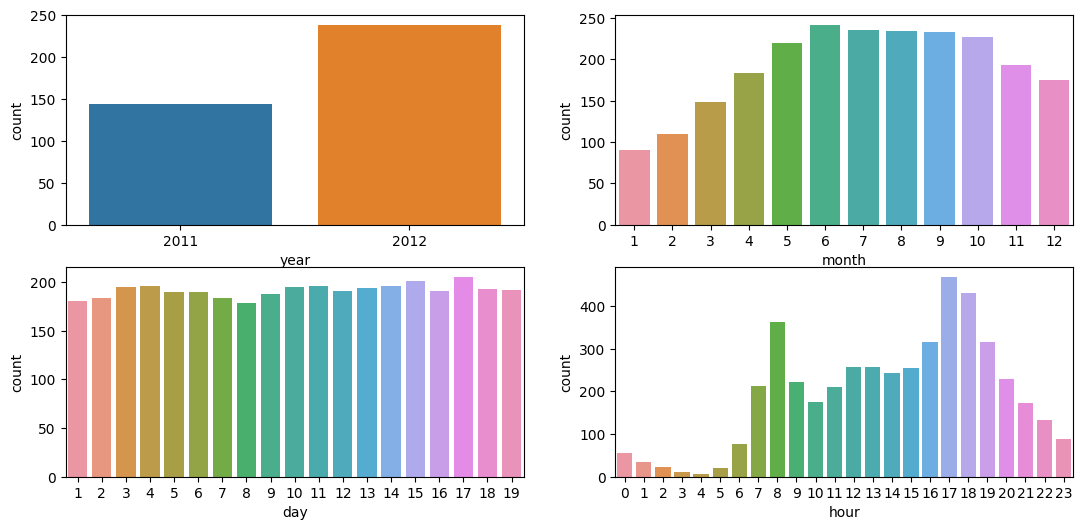

In [9]:
fig = plt.figure(figsize=[13,6])

# 년도와 count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'year', y = 'count', data = train.groupby('year').mean()['count'].reset_index())

# month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = 'month', y = 'count', data = train.groupby('month').mean()['count'].reset_index())

# day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = 'day', y = 'count', data = train.groupby('day').mean()['count'].reset_index())

# hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x = 'hour', y = 'count', data = train.groupby('hour').mean()['count'].reset_index())

plt.show()

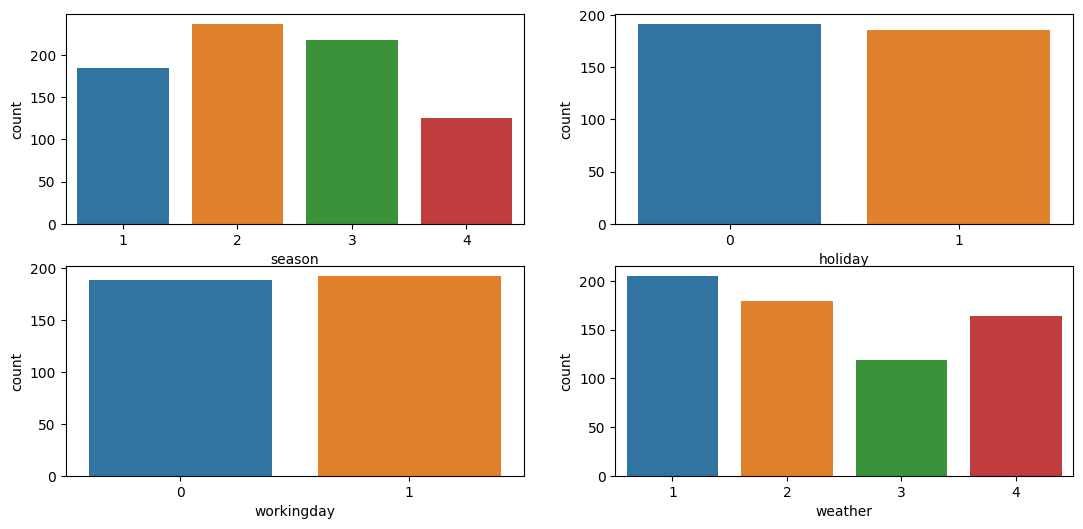

In [10]:
fig = plt.figure(figsize=[13,6])

# 계절과 count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'season', y = 'count', data = train.groupby('season').mean()['count'].reset_index())

# 휴일과 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = 'holiday', y = 'count', data = train.groupby('holiday').mean()['count'].reset_index())

# 작업일과 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = 'workingday', y = 'count', data = train.groupby('workingday').mean()['count'].reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x = 'weather', y = 'count', data = train.groupby('weather').mean()['count'].reset_index())

plt.show()

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


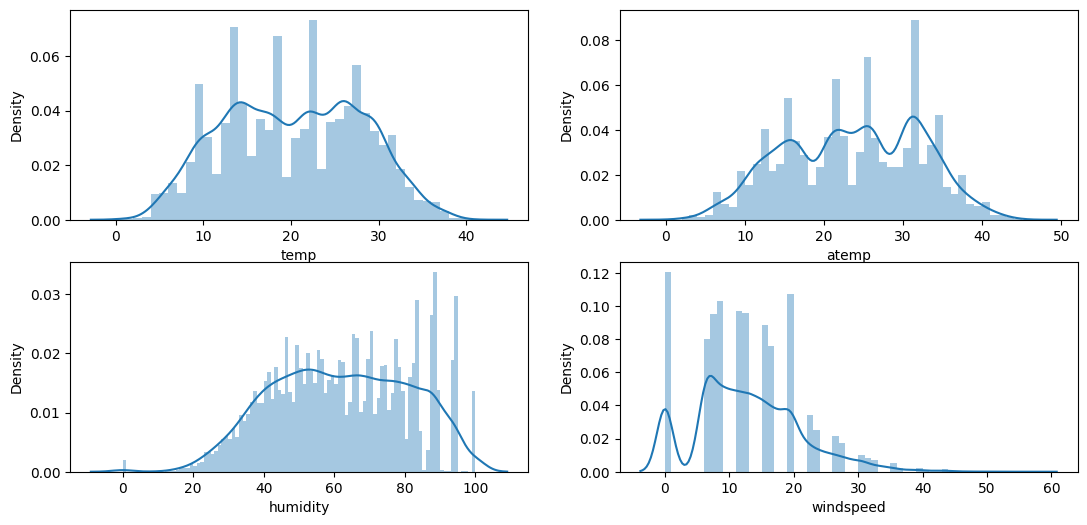

In [12]:
fig = plt.figure(figsize=[13,6])

# 온도와 count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp, bins = range(train.temp.min().astype('int'), train.temp.max().astype('int')+1))

# 체감온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp, bins = range(train.atemp.min().astype('int'), train.atemp.max().astype('int')+1))

# 습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity, bins = range(train.humidity.min().astype('int'), train.humidity.max().astype('int')+1))

# 풍속과 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed, bins = range(train.windspeed.min().astype('int'), train.windspeed.max().astype('int')+1))

plt.show()

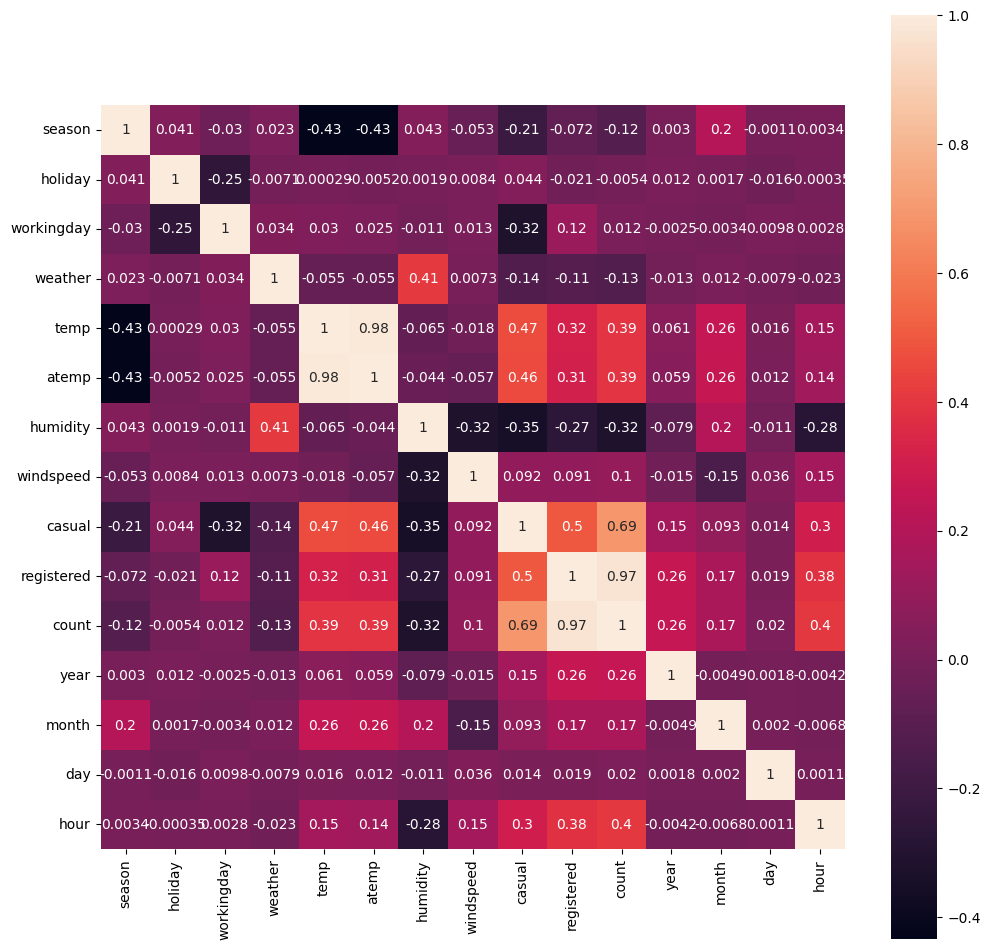

In [13]:
fig = plt.figure(figsize = [12,12])
ax = sns.heatmap(train.corr(), annot=True, square=True)

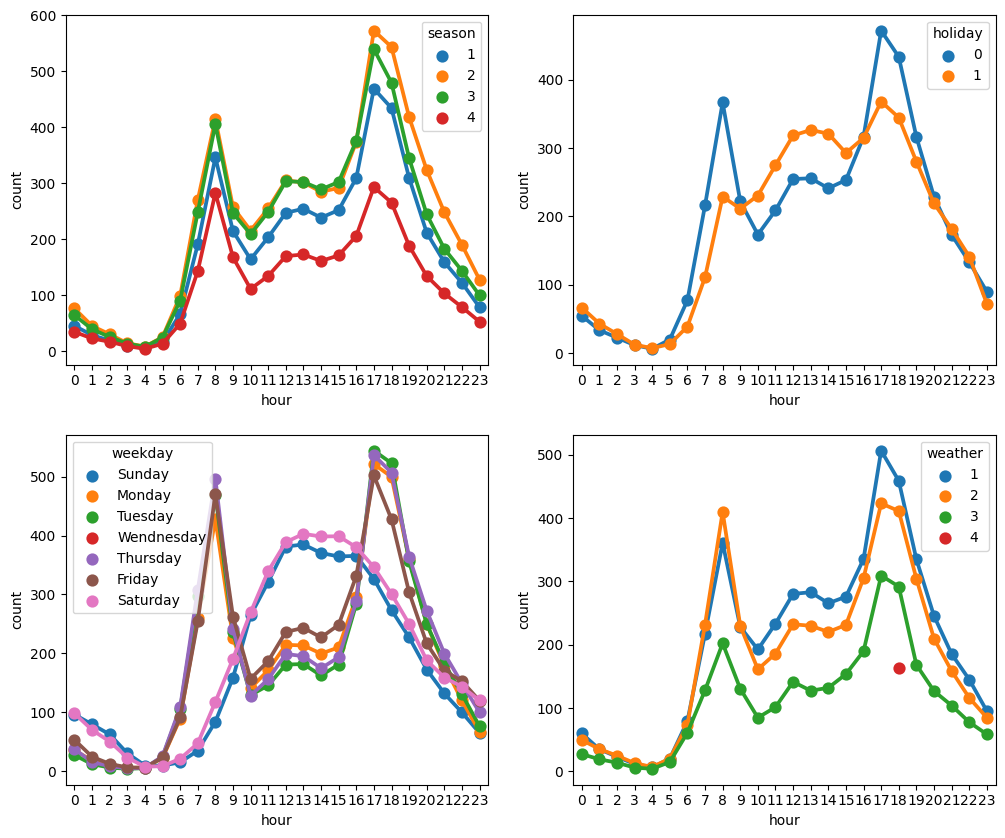

In [14]:
#heatmap 상관관계가 적은 2개의 컬럼을 사용한 count 시각화

#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [15]:
# 마지막 시각화에 이상치 확인
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


<Axes: xlabel='month', ylabel='count'>

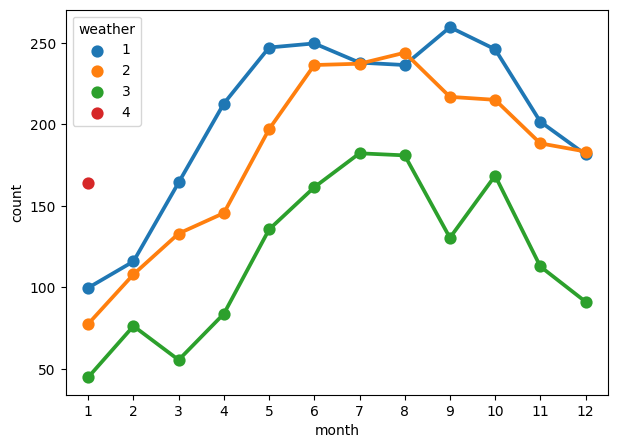

In [16]:
# weather 4는 1월달에만 한 번 발현됨
fig = plt.figure(figsize=[7,5])

sns.pointplot(x='month', y='count', hue='weather', data=train.groupby(['month', 'weather'])['count'].mean().reset_index())

#### 학습데이터 값 조정 (Random Forest)

Windspeed 분포를 표현한 그래프에서 0인 값들에 데이터를 활용하여 windspeed값 부여

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [18]:
# 머신러닝 모델 훈련 시 문자열 값은 불가능하므로 문자열 카테고리화 후 숫자 변환 필요
train['weekday'] = train.weekday.astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  int64   
 14  day         10886 non-null  int64   
 15  weekday     10886 non-null  category
 16  hour        10886 non-null  int64   
dtypes: category(1), float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [19]:
# 시리즈에 바로 categories나 codes를 사용하면 에러가 발생
# train.weekday.codes

In [20]:
#0:Sunday --> 6:Saturday
train.weekday.cat.categories = ['5','1','6','0','4','2','3']
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,6,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,6,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,6,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,6,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,6,4


[RandomForest로 Windspeed값을 부여]

1. 데이터프레임을 Windspeed == 0 기준으로 분리
2. 학습 시 0이 아닌 데이터 프레임에서 Windspeed만 담긴 Series와 이외의 학습시킬 column들로 분리
3. Windspeed가 0인 데이터프레임에 Windspeed값을 부여

In [21]:
from sklearn.ensemble import RandomForestRegressor

# 데이터셋 분리
windspeed_0 = train[train.windspeed == 0]
windspeed_Not0 = train[train.windspeed != 0]

# 학습시킬 column만 선택
windspeed_0_df = windspeed_0.drop(['datetime','windspeed','casual','registered','count'], axis = 1)
windspeed_Not0_df = windspeed_Not0.drop(['datetime','windspeed','casual','registered','count'], axis = 1) # train_x
windspeed_Not0_series = windspeed_Not0['windspeed'] # train_y

# 0이 아닌 데이터프레임 Randomforest로 학습
rf = RandomForestRegressor()
rf.fit(X = windspeed_Not0_df, y = windspeed_Not0_series)

# 예측값 삽입
windspeed_0['windspeed'] = rf.predict(windspeed_0_df)

# 나눈 데이터프레임 합치기
train = pd.concat([windspeed_0, windspeed_Not0], axis = 0)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,8.641861,3,13,16,2011,1,1,6,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,8.362002,8,32,40,2011,1,1,6,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,8.192090,5,27,32,2011,1,1,6,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,7.702119,3,10,13,2011,1,1,6,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,7.432243,0,1,1,2011,1,1,6,4


In [22]:
# 시간별 정렬 위해 'datetime' 컬럼 값을 string에서 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train.datetime, errors = 'coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  weekday     10886 non-null  category      
 16  hour        10886 non-

In [23]:
# 합친 데이터를 다시 시간순으로 정렬
train = train.sort_values(by = 'datetime')

Min value of windspeed is 6.0032


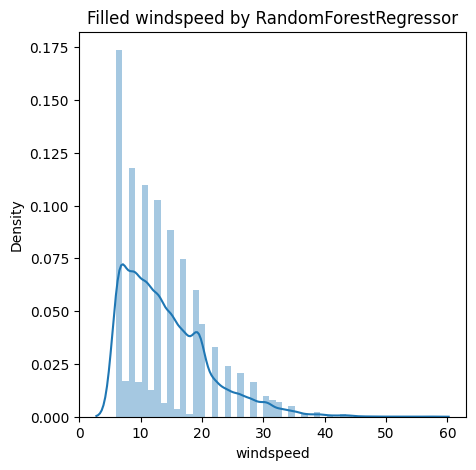

In [24]:
# windspeed = 0.0 대체 후 시각화
fig = plt.figure(figsize = [5,5])
sns.distplot(train.windspeed, bins = np.linspace(train.windspeed.min(), train.windspeed.max()))
plt.title('Filled windspeed by RandomForestRegressor')

print('Min value of windspeed is {}'.format(train.windspeed.min()))

#### 전체 데이터 전처리 및 값 조정

In [25]:
# 데이터셋 불러오기
train = pd.read_csv("/content/drive/MyDrive/Bigdata_Analysis/bike-sharing-demand/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Bigdata_Analysis/bike-sharing-demand/test.csv")

# 데이터 합치기
combine = pd.concat([train, test], axis = 0)

# 시간 및 계절 전처리
combine['tempdate'] = combine.datetime.apply(lambda x:x.split())

combine['weekday'] = combine.tempdate.apply(lambda x: calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

combine['year'] = combine.tempdate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempdate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempdate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempdate.apply(lambda x: x[1].split(':')[0])

combine['year'] = pd.to_numeric(combine.year, errors = 'coerce')
combine['month'] = pd.to_numeric(combine.month, errors = 'coerce')
combine['day'] = pd.to_numeric(combine.day, errors = 'coerce')
combine['hour'] = pd.to_numeric(combine.hour, errors = 'coerce')

combine.drop('tempdate', axis = 1, inplace = True)

combine['season'] = combine.month.apply(moveSeason)

# windspeed 값 조정
combine['weekday'] = combine.weekday.astype('category')
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

windspeed_0 = combine[combine.windspeed == 0]
windspeed_Not0 = combine[combine.windspeed != 0]

windspeed_0_df = windspeed_0.drop(['datetime','windspeed','casual','registered','count'], axis = 1)
windspeed_Not0_df = windspeed_Not0.drop(['datetime','windspeed','casual','registered','count'], axis = 1) # train_x
windspeed_Not0_series = windspeed_Not0['windspeed'] # train_y

rf2 = RandomForestRegressor()
rf2.fit(X = windspeed_Not0_df, y = windspeed_Not0_series)

windspeed_0['windspeed'] = rf2.predict(windspeed_0_df)

combine = pd.concat([windspeed_0, windspeed_Not0], axis = 0)
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.502392,3.0,13.0,16.0,6,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.902608,8.0,32.0,40.0,6,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.872659,5.0,27.0,32.0,6,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.812627,3.0,10.0,13.0,6,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.772628,0.0,1.0,1.0,6,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,1,2012,12,31,22


In [26]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    17379 non-null  object  
 1   season      17379 non-null  int64   
 2   holiday     17379 non-null  int64   
 3   workingday  17379 non-null  int64   
 4   weather     17379 non-null  int64   
 5   temp        17379 non-null  float64 
 6   atemp       17379 non-null  float64 
 7   humidity    17379 non-null  int64   
 8   windspeed   17379 non-null  float64 
 9   casual      10886 non-null  float64 
 10  registered  10886 non-null  float64 
 11  count       10886 non-null  float64 
 12  weekday     17379 non-null  category
 13  year        17379 non-null  int64   
 14  month       17379 non-null  int64   
 15  day         17379 non-null  int64   
 16  hour        17379 non-null  int64   
dtypes: category(1), float64(6), int64(9), object(1)
memory usage: 2.3+ MB


In [27]:
# int 속성을 가진 컬럼들 category화
#for col in ['season','holiday','workingday','weather','humidity','year','month','day','hour']:
#  combine[col] = combine[col].astype('category')

In [28]:
# category 속성을 가진 컬럼 int로 (선형 회귀 위해)
combine['weekday'] = combine.weekday.astype('int')

# 합쳐진 combine셋에서 count의 유무로 훈련과 테스트셋 분리
train = combine[combine['count'].notnull()].sort_values(by='datetime')
test = combine[combine['count'].isnull()].sort_values(by='datetime')

# 훈련 시 필요한 결과값 추출
test_datetime = test['datetime']
target_y = train['count']

# 필요없는 컬럼 제거
train.drop(['datetime','casual','registered','count'], axis = 1, inplace = True)
test.drop(['datetime','casual','registered','count'], axis = 1, inplace = True)

In [29]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,day,hour
0,4,0,0,1,9.84,14.395,81,7.502392,6,2011,1,1,0
1,4,0,0,1,9.02,13.635,80,6.902608,6,2011,1,1,1
2,4,0,0,1,9.02,13.635,80,6.872659,6,2011,1,1,2
3,4,0,0,1,9.84,14.395,75,6.812627,6,2011,1,1,3
4,4,0,0,1,9.84,14.395,75,6.772628,6,2011,1,1,4


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   weekday     10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.2 MB


### 예측 및 평가

#### 평가함수 구현

- RMSLE (Root Mean Squared Log Error): log scale로 outlier에 강함. 0에 가까운 값이 나올 수록 정밀도가 높음

$$RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (log(\hat{y_i} + 1) - log(y_i + 1))^2}$$

    mean_squared_log_error(): 데이터 값의 크기에 따라 오버플로/언더플로 오류가 발생 가능

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred_y):
  squared_error = (np.log1p(pred_y) - np.log1p(y))**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred_y):
  rmse = np.sqrt(mean_squared_error(y, pred_y))
  return rmse

def evaluate_regr(y, pred_y):
  rmsle_val = rmsle(y, pred_y)
  rmse_val = rmse(y, pred_y)
  mae_val = mean_absolute_error(y, pred_y)
  print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

#### 선형회귀 모델

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train, target_y, test_size = 0.3, random_state = 0)

# 선형 회귀 모델
lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 1.174, RMSE: 140.755, MAE: 105.753


Text(0.5, 1.0, 'Log-transformed count value')

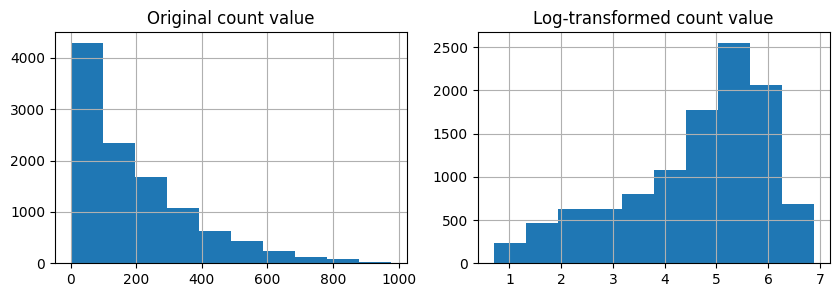

In [33]:
fig = plt.figure(figsize=[10,3])

ax1 = fig.add_subplot(1,2,1)
ax1 = target_y.hist()
plt.title("Original count value")

ax2 = fig.add_subplot(1,2,2)
ax2 = np.log1p(target_y).hist()
plt.title("Log-transformed count value")

    target_y값이 왼쪽으로 치우쳤으므로 log변환 하는 것이 바람직해 보임

In [34]:
# log 변환된 데이터로 학습
X_train, X_test, y_train, y_test = train_test_split(train, np.log1p(target_y), test_size = 0.3, random_state = 0)

# 선형 회귀 모델
lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# log변환 후 pred값을 얻었으므로 다시 원래의 값으로 되돌린 후 평가해야 함
print('###LinearRegression###')
evaluate_regr(np.exp(y_test)-1, np.exp(pred)-1)

###LinearRegression###
RMSLE: 1.016, RMSE: 162.815, MAE: 109.274


<Axes: xlabel='coef'>

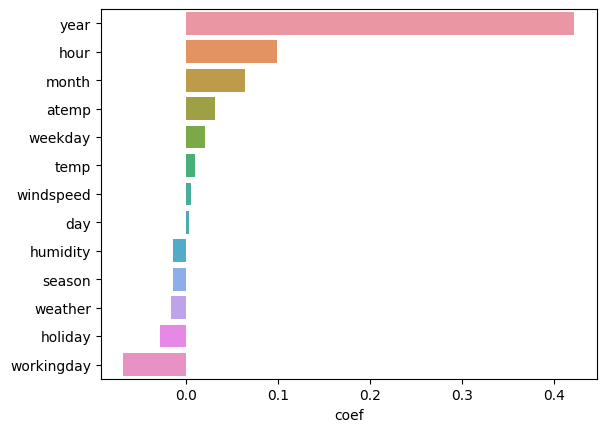

In [35]:
# coefficient 값 비교
lr_coef = pd.DataFrame(lr.coef_, index = train.columns, columns = ['coef'])
lr_coef.sort_values(by='coef', ascending=False, inplace=True)
sns.barplot(x=lr_coef.coef, y=lr_coef.index)

##### 원-핫 인코딩

In [36]:
# 범주형 변수 가변수화
train_ohe = pd.get_dummies(train, columns=['season', 'holiday','workingday','weather','weekday','year','month','day','hour'])

# 훈련 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(train_ohe, np.log1p(target_y), test_size = 0.3, random_state = 0)

In [37]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_exp = False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  if is_exp:
    y_test = np.exp(y_test)-1
    pred = np.exp(pred)-1

  print('###{}###'.format(model.__class__.__name__))
  evaluate_regr(y_test, pred)

lr = LinearRegression()
get_model_predict(lr, X_train, X_test, y_train, y_test, is_exp = True)

###LinearRegression###
RMSLE: 0.586, RMSE: 98.583, MAE: 63.666


    더미 변수로 바꿔 관계성을 없앴더니 예측값과 실제값간의 차이 감소

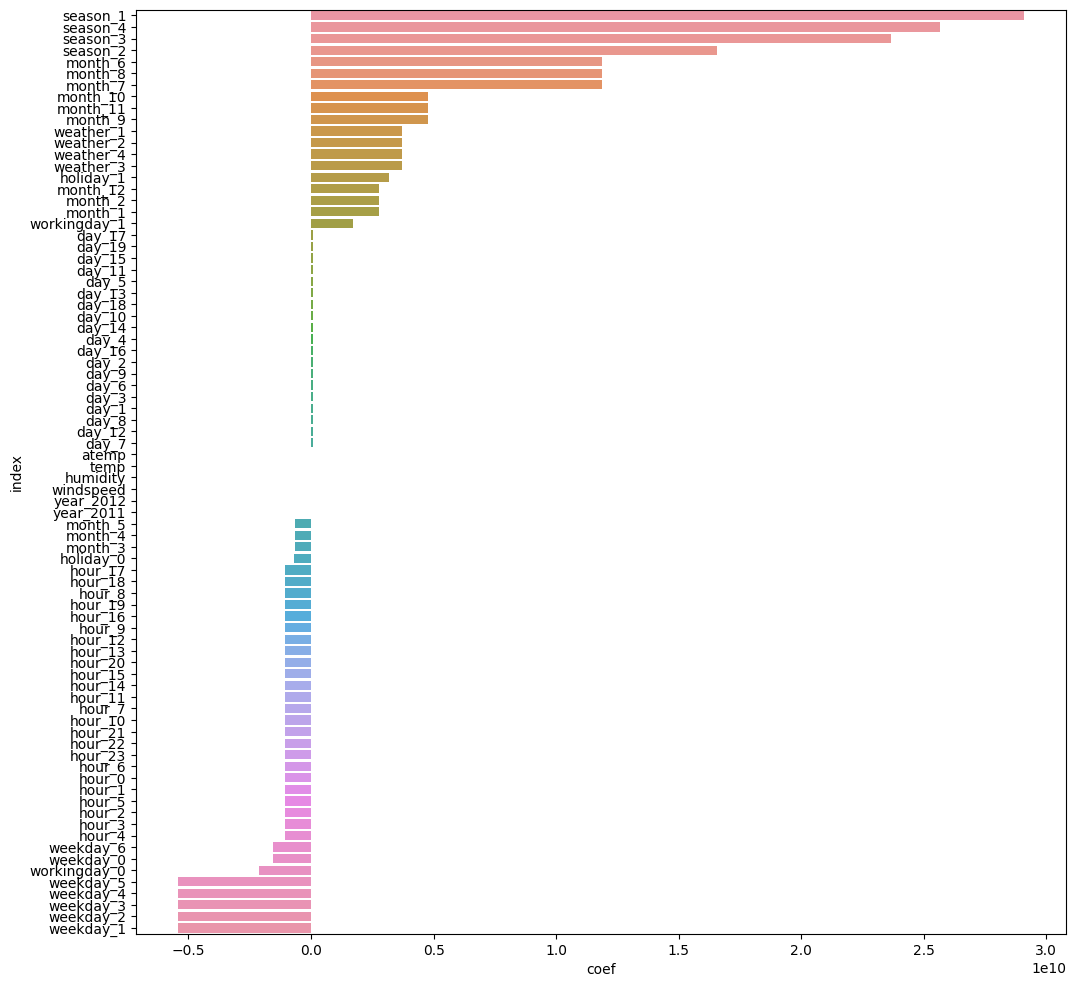

In [38]:
lr_coef = pd.DataFrame(lr.coef_, index = X_train.columns, columns = ['coef'])
lr_coef.reset_index(inplace=True)
lr_coef.sort_values(by='coef', ascending=False, inplace=True)

plt.figure(figsize=[12,12])
sns.barplot(x='coef', y='index', data=lr_coef)
plt.show()

##### Ridge & Lasso

In [39]:
alpha_list = [0.001,0.01,0.1,1.0,10]

for alpha in alpha_list:
  ridge = Ridge(alpha)
  lasso = Lasso(alpha)

  print('For alpha is {}:'.format(alpha))
  get_model_predict(ridge, X_train, X_test, y_train, y_test, is_exp = True)
  get_model_predict(lasso, X_train, X_test, y_train, y_test, is_exp = True)
  print('')

For alpha is 0.001:
###Ridge###
RMSLE: 0.586, RMSE: 98.583, MAE: 63.666
###Lasso###
RMSLE: 0.586, RMSE: 98.862, MAE: 63.469

For alpha is 0.01:
###Ridge###
RMSLE: 0.586, RMSE: 98.583, MAE: 63.667
###Lasso###
RMSLE: 0.636, RMSE: 114.104, MAE: 73.305

For alpha is 0.1:
###Ridge###
RMSLE: 0.586, RMSE: 98.586, MAE: 63.668
###Lasso###
RMSLE: 1.231, RMSE: 174.905, MAE: 120.053

For alpha is 1.0:
###Ridge###
RMSLE: 0.586, RMSE: 98.624, MAE: 63.680
###Lasso###
RMSLE: 1.240, RMSE: 177.722, MAE: 121.342

For alpha is 10:
###Ridge###
RMSLE: 0.586, RMSE: 99.283, MAE: 63.919
###Lasso###
RMSLE: 1.422, RMSE: 204.996, MAE: 145.240



#### 결정트리 모델

##### 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(train, np.log1p(target_y), test_size = 0.3, random_state = 0)

for n in range(100,1000,100):
  rf = RandomForestRegressor(n_estimators = n, random_state = 0)

  print('For n_estimators = {}:'.format(n))
  get_model_predict(rf, X_train, X_test, y_train, y_test, is_exp = True)
  print('')

For n_estimators = 100:
###RandomForestRegressor###
RMSLE: 0.316, RMSE: 45.538, MAE: 26.649

For n_estimators = 200:
###RandomForestRegressor###
RMSLE: 0.315, RMSE: 45.344, MAE: 26.508

For n_estimators = 300:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 45.116, MAE: 26.391

For n_estimators = 400:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.960, MAE: 26.348

For n_estimators = 500:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.996, MAE: 26.328

For n_estimators = 600:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.972, MAE: 26.305

For n_estimators = 700:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.913, MAE: 26.275

For n_estimators = 800:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.884, MAE: 26.271

For n_estimators = 900:
###RandomForestRegressor###
RMSLE: 0.314, RMSE: 44.831, MAE: 26.249



##### 그래디언트 부스팅

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr_params = {
    'n_estimators': [300,400],
    'learning_rate': [0.1,0.01]
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=5)
gbr_grid.fit(X_train, y_train)
gbr_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

In [42]:
gbr = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.1, random_state = 0)

print('For n_estimators = 400, learning_rate = 0.1:')
get_model_predict(gbr, X_train, X_test, y_train, y_test, is_exp = True)

For n_estimators = 400, learning_rate = 0.1:
###GradientBoostingRegressor###
RMSLE: 0.303, RMSE: 47.534, MAE: 28.457


##### XGBOOST 

하이퍼파라미터 참고: 
1. http://machinelearningkorea.com/2019/09/29/lightgbm-파라미터/

2. https://injo.tistory.com/44




In [61]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb_params = {
    'max_depth': [3, 5, 7], # 트리 최대 깊이 (기본값 3)
    'n_estimators': [100, 300, 500], # weak learner 수 (기본값 100)
    'learning_rate': [0.1, 0.3, 0.5], # 학습률 (기본값 0.1)
    'colsample_bytree': [0.7, 1], #  max_feature와 유사 (기본 1)
}

###########################################################
# 너무 오래걸려서 한번만 실행 후 결과만 다음 코드에 사용
###########################################################
#xgb_grid = GridSearchCV(xgb, xgb_params)
#xgb_grid.fit(X_train, y_train)
#print(xgb_grid.best_params_)
#결과: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [62]:
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.1, n_estimators = 500, colsample_bytree = 0.7, random_state = 0)

print('For max_depth = 5, learning_rate = 0.1, n_estimators = 500, colsample_bytree = 0.7:')
get_model_predict(xgb, X_train, X_test, y_train, y_test, is_exp = True)

For max_depth = 5, learning_rate = 0.1, n_estimators = 500, colsample_bytree = 0.7:
###XGBRegressor###
RMSLE: 0.283, RMSE: 40.459, MAE: 24.209


### 최종 제출

In [69]:
predTest = np.exp(xgb.predict(test)) - 1
predTest

array([ 10.031014 ,   5.3332157,   3.179288 , ..., 139.97514  ,
       115.595474 ,  70.91796  ], dtype=float32)

In [74]:
submission = pd.DataFrame({
    "datetime": test_datetime,
    "count": np.round(predTest)
    })

submission

,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,2.0
4,2011-01-20 04:00:00,2.0
...,...,...
6488,2012-12-31 19:00:00,320.0
6489,2012-12-31 20:00:00,213.0
6490,2012-12-31 21:00:00,140.0
6491,2012-12-31 22:00:00,116.0


In [75]:
submission.to_csv("/content/drive/MyDrive/Bigdata_Analysis/bike-sharing-demand/FianlSubmission.csv", index = False)